<a href="https://colab.research.google.com/github/univ-3360-vu-smartcities/clustering-demo/blob/master/Clustering_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Algorithms

In this example, we will be looking at how to implement k-means clustering using scikit-learn, and some of the advantages and disadvantages of this algorithm.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Import

For this example, we will use a dataset of customer spending at a retail mall. The data includes demographic data about customers and a spending score representing how much money they spent in their combined trip to the mall.

In [2]:
data_path = "https://raw.githubusercontent.com/univ-3360-vu-smartcities/example-notebooks/master/datasets/Mall_Customers.csv"
mall_data = pd.read_csv(data_path)
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Exploration

We can plot some of this data to explore replationships between variables. First, we can start with histograms to get an overall sense of the data.

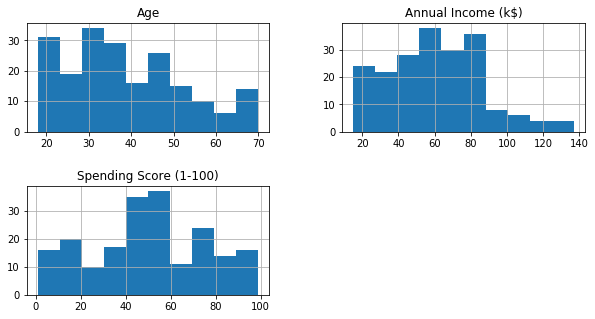

In [11]:
mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
plt.show()

We can also plot histograms for subsets of data to get an idea of how certain variables affect others. For example, lets plot histograms divided into male shoppers and female shoppers.

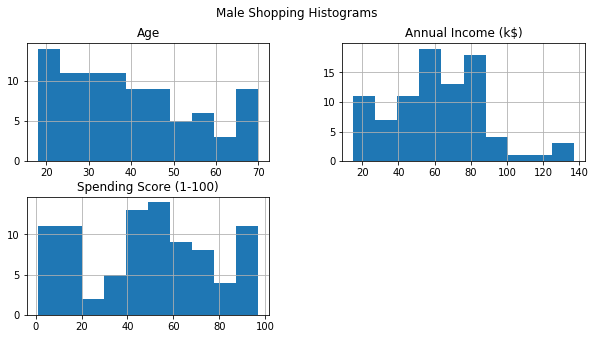

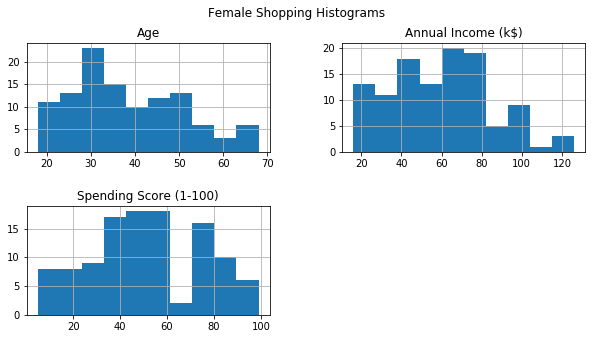

In [15]:
mall_data[mall_data['Gender']=='Male'][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(figsize=(10,5))
plt.suptitle("Male Shopping Histograms")
mall_data[mall_data['Gender']=='Female'][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(figsize=(10,5))
plt.suptitle("Female Shopping Histograms")
plt.subplots_adjust(hspace=0.5)
plt.show()

We can also plot features against one another to start seeing the formation of clusters.

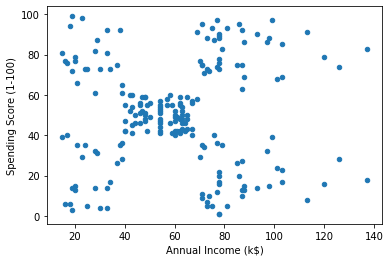

In [19]:
mall_data.plot(x='Annual Income (k$)', y='Spending Score (1-100)', kind='scatter')
plt.show()

Although, clusters are not as obvious for other pairs of features.

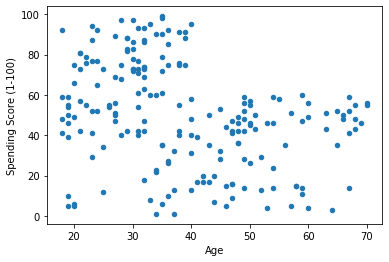

In [20]:
mall_data.plot(x='Age', y='Spending Score (1-100)', kind='scatter')
plt.show()

# K-Means Clustering

Now that we have a cursory understanding of the data, we can begin to cluster it. We will use scikit-learn to easily implement K-means clustering.

In [0]:
from sklearn.cluster import KMeans

## Simple K-Means

As a simple example, let us try to cluster two variables at once. For example, lets take annual income and spending score. From our earlier plotting, it seems fairly clear that these two variables have 5 clusters. So, lets train the K-means algorithm specifying k=5.

In [88]:
k_means = KMeans(n_clusters=5, random_state=4)
k_means.fit(mall_data[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=4, tol=0.0001, verbose=0)

Once the model is trained, we can print the labels and the centroids for each cluster.

In [89]:
k_means_labels = k_means.labels_
print("Labels: ", k_means_labels)
print()

k_means_centroids = k_means.cluster_centers_
print("Centroids: \n", k_means_centroids)

Labels:  [1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]

Centroids: 
 [[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


We can also plot the data color coodinated with the determined cluster. This will allow us to see if K-means matched our intuition of the data.

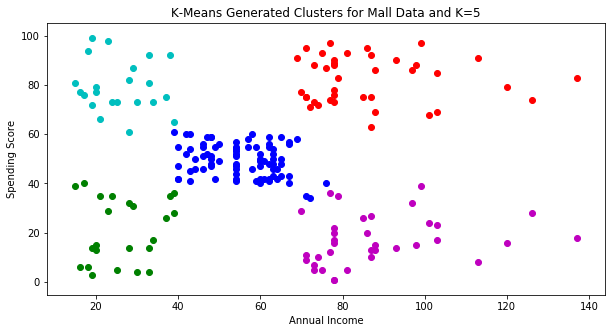

In [90]:
plt.figure(figsize=(10,5))
unique_labels = set(k_means_labels)
core_samples_mask = np.zeros_like(k_means_labels, dtype=bool)
colors = ['b','g','r','c','m','y','k']

for k in unique_labels:
    class_member_mask = (k_means_labels == k)
    xy = mall_data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy['Annual Income (k$)'], xy['Spending Score (1-100)'], color=colors[k%7])

plt.title("K-Means Generated Clusters for Mall Data and K=5")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

## Effect of Wrong K Parameter

One of the main issues with the K-means algorithm is that the number of clusters must be known before running the algorithm. But what happens if we run K-means with the wrong number of clusters? Let's try the same data but using 3 clusters instead of 5.

In [0]:
k_means = KMeans(n_clusters=3, random_state=4)
k_means.fit(mall_data[['Annual Income (k$)','Spending Score (1-100)']])

k_means_labels = k_means.labels_
k_means_centroids = k_means.cluster_centers_

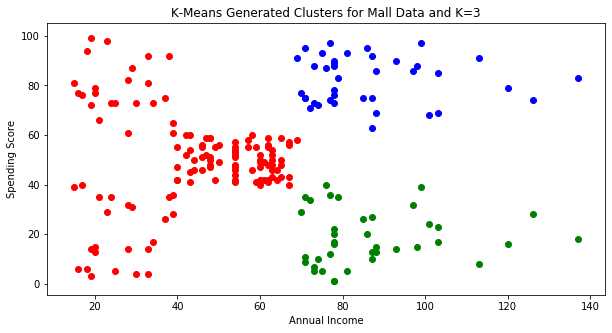

In [92]:
plt.figure(figsize=(10,5))
unique_labels = set(k_means_labels)
core_samples_mask = np.zeros_like(k_means_labels, dtype=bool)
colors = ['b','g','r','c','m','y','k']

for k in unique_labels:
    class_member_mask = (k_means_labels == k)
    xy = mall_data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy['Annual Income (k$)'], xy['Spending Score (1-100)'], color=colors[k%7])

plt.title("K-Means Generated Clusters for Mall Data and K=3")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

As you can see, while the clustering might not be the ideal clustering of the data, K-means still provided a somewhat sensible interpretation.

## Unknown K Value

So how do we actually determine the value of K? For the above two features, it was fairly clear by intuition, but what happens if it is not as clear? For example, consider the features of age and spending score. There is not as immediately obvious of a relationship.

As a first test, lets use the same k=5 that we used on the other features.

In [0]:
k_means = KMeans(n_clusters=5, random_state=4)
k_means.fit(mall_data[['Age','Spending Score (1-100)']])

k_means_labels = k_means.labels_
k_means_centroids = k_means.cluster_centers_

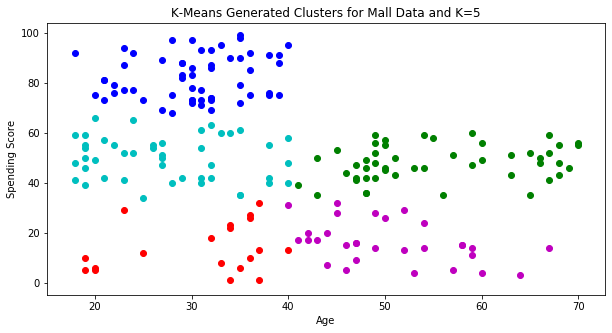

In [94]:
plt.figure(figsize=(10,5))
unique_labels = set(k_means_labels)
core_samples_mask = np.zeros_like(k_means_labels, dtype=bool)
colors = ['b','g','r','c','m','y','k']

for k in unique_labels:
    class_member_mask = (k_means_labels == k)
    xy = mall_data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy['Age'], xy['Spending Score (1-100)'], color=colors[k%7])

plt.title("K-Means Generated Clusters for Mall Data and K=5")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

As you can see, this produces an arguably sensible clustering of the data. However, we really just guessed here. Instead, we would like to determine the value of K from the data itself. This is not an easy task, but there are some heuristics we can use.

The overall goal of clustering is to minimize the within cluster distance and simultaneously maximize the between cluster distance. There are several metrics that we can use to measure this. One such metric is *inertia* which measures the sum of squared distances of samples to their closest cluster center. If we run K-means for a variety of k values, we can use inertia to get a better view of how the clustering is working.

In [0]:
k_values = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []

for k in k_values:
  k_means = KMeans(n_clusters=k, random_state=4)
  k_means.fit(mall_data[['Age','Spending Score (1-100)']])
  inertia_values.append(k_means.inertia_)

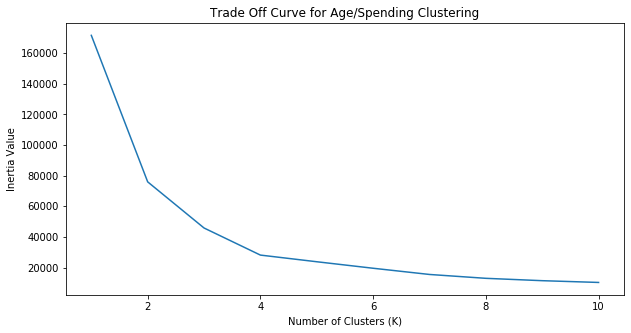

In [77]:
plt.figure(figsize=(10,5))
plt.plot(k_values, inertia_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia Value")
plt.title("Trade Off Curve for Age/Spending Clustering")
plt.show()

So you can see that the inertia approches zero as the number of clusters increases, which is what we would expect. However, in order to make our clustering more generalizable and actually find patterns, we cannot just increase k indefinitely. One technique for choosing k is to pick the "knee of the curve", also known as the trade-off point, of this inertia curve. For this data, we can see that this occurs around K=3.

So, let's try plotting the clustering of K=3.

In [0]:
k_means = KMeans(n_clusters=3, random_state=4)
k_means.fit(mall_data[['Age','Spending Score (1-100)']])

k_means_labels = k_means.labels_
k_means_centroids = k_means.cluster_centers_

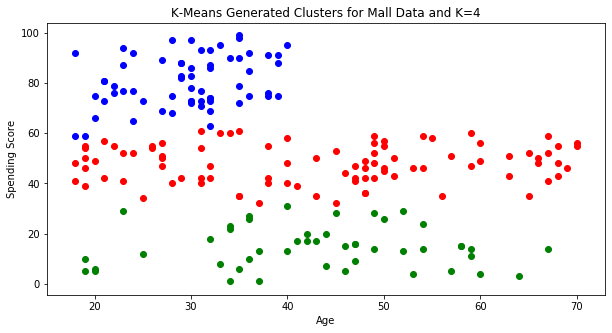

In [96]:
plt.figure(figsize=(10,5))
unique_labels = set(k_means_labels)
core_samples_mask = np.zeros_like(k_means_labels, dtype=bool)
colors = ['b','g','r','c','m','y','k']

for k in unique_labels:
    class_member_mask = (k_means_labels == k)
    xy = mall_data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy['Age'], xy['Spending Score (1-100)'], color=colors[k%7])

plt.title("K-Means Generated Clusters for Mall Data and K=4")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

As you can see, this revealed some kind of underlying structure to this data that was not immediately obvious at first glace. This technique of using the trade-off curve to determine the value of K is quite powerfull and very common.

# Non-Globular Clusters

So we have seen that K-means is extremely powerful if the correct value of K is chosen. However, if it universal? Can we cluster any data using K-means?

As it turns out, there are certain types of data that are not ammenable to K-means. For an example, lets take a look at the moon data from scikit-learn.

In [0]:
from sklearn.datasets import make_moons

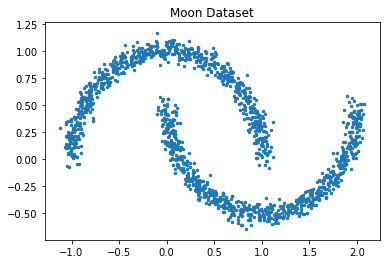

In [100]:
X_moon_data, _ = make_moons(n_samples=1500, noise=0.05, random_state=1)

plt.scatter(X_moon_data[:,0], X_moon_data[:,1], s=6)
plt.title("Moon Dataset")
plt.show()

Clearly, there are two distinct clusters in this dataset. So, let's try running K-means with K=2 to see how it clusters the moon data.

In [0]:
k_means_moon = KMeans(n_clusters=2)
k_means_moon.fit(X_moon_data)

k_means_labels = k_means_moon.labels_
k_means_centroids = k_means_moon.cluster_centers_

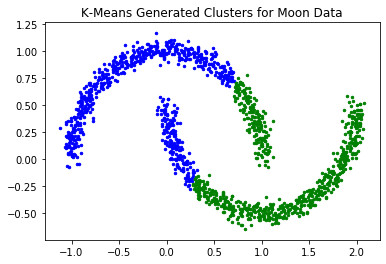

In [102]:
unique_labels = set(k_means_labels)
core_samples_mask = np.zeros_like(k_means_labels, dtype=bool)
colors = ['b','g','r','c','m','y','k']

for k in unique_labels:
    class_member_mask = (k_means_labels == k)
    xy = X_moon_data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=6, color=colors[k%7])

plt.title("K-Means Generated Clusters for Moon Data")
plt.show()

So we can see that a somewhat unexpected result occurs. K-means was not able to generate clusters for the moons and instead generated two clusters that both overlapped the actual clusters. This happens because the ordinary version of K-means generates globular shaped clusters only. So, for clusters which do not follow this patter, K-means is not a good choice. 

For data that has these kinds of non-globular clusters, we should instead use a different clustering algorithm such as density-based or hierarchical clustering. We will learn more about these techniques in the future.